# Outliers

Outliers can have a significant impact on the results. Here’s a quick guide to detecting and dealing with outliers:

### 1. **Detecting Outliers**
#### a. Visual Inspection:
   - **Box Plots:** A box plot represents the distribution of the data and its central tendency. Points that are located outside the "whiskers" of the box plot are typically considered as outliers.
   - **Scatter Plots:** Useful to see the spread of data and identify potential outliers in bivariate analysis.
   - **Histograms:** Helps to identify outliers in univariate analysis by visualizing the data distribution.

#### b. Statistical Methods:
   - **Z-Score:** A Z-score represents the number of standard deviations a data point is from the mean. A high absolute value of Z-score (typically above 3) indicates that the data point is likely an outlier.
   - **IQR Method:** Outliers can be identified by finding values that lie below Q1 - 1.5*IQR or above Q3 + 1.5*IQR, where Q1 and Q3 are the first and third quartiles, respectively, and IQR is the interquartile range (Q3 - Q1).

### 2. **Handling Outliers**
#### a. Removal:
   - **Truncation:** Simply remove outlier values.
   - **Winsorizing:** Cap the outlier values to a certain threshold.

#### b. Transformation:
   - **Log Transformation:** Reduces the impact of outliers but requires all values to be positive.
   - **Box-Cox Transformation:** Generalizes the power transformation and can stabilize variance and make the data more normal distribution-like.

#### c. Imputation:
   - Replace outlier values with statistical measures such as mean, median, or mode.

#### d. Robust Methods:
   - Use models and methods that are robust to outliers, such as robust regression methods, tree-based models, or ensemble methods.

### Example
Here’s an example of detecting and handling outliers using Python and the `scipy.stats` module for Z-score and the `numpy` library for IQR method.


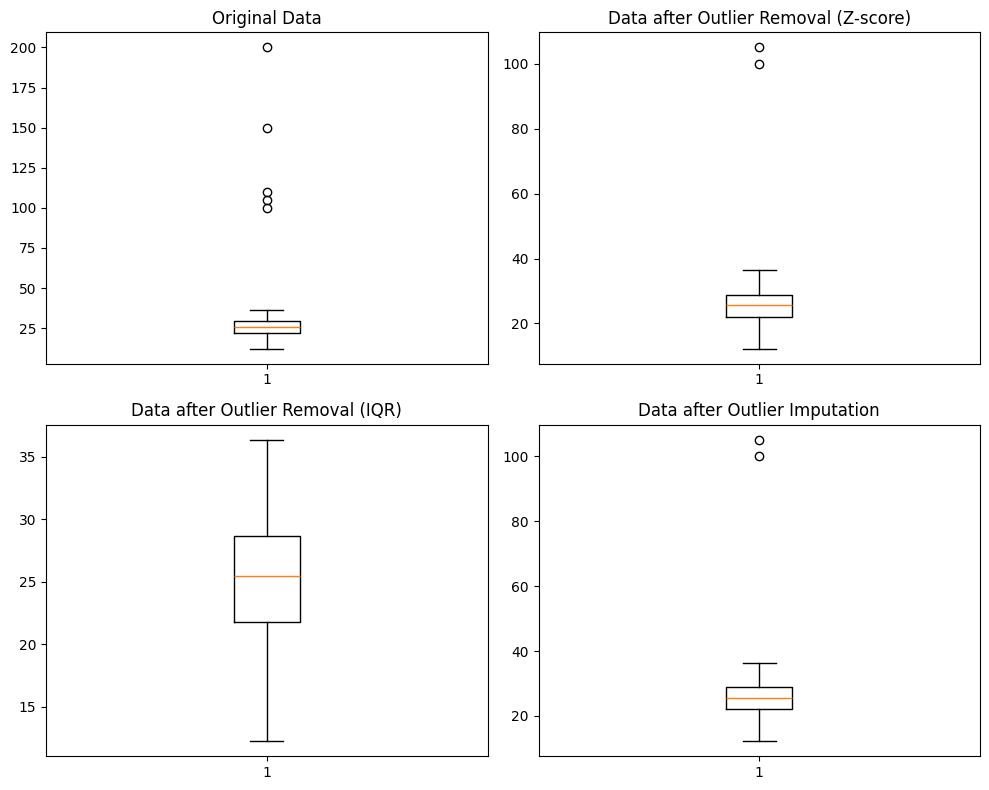

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# More complex example data
np.random.seed(0)
data = {'Value': np.random.normal(25, 5, 100).tolist() + [100, 105, 110, 150, 200]}
df = pd.DataFrame(data)

# Original DataFrame
original_df = df.copy()

# Detecting outliers using Z-score
df['Z_Score'] = zscore(df['Value'])
outliers_z_score = df[np.abs(df['Z_Score']) > 3]

# Detecting outliers using IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Value'] < (Q1 - 1.5 * IQR)) | (df['Value'] > (Q3 + 1.5 * IQR))]

# Handling outliers: Removal
df_no_outliers_z = df[np.abs(df['Z_Score']) <= 3]
df_no_outliers_iqr = df[(df['Value'] >= (Q1 - 1.5 * IQR)) & (df['Value'] <= (Q3 + 1.5 * IQR))]

# Handling outliers: Imputation (Replace with Median)
df_imputed = df.copy()
df_imputed['Value'].where(~df.index.isin(outliers_z_score.index), df['Value'].median(), inplace=True)

# Create Subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs[0, 0].boxplot(original_df['Value'])
axs[0, 0].set_title('Original Data')

axs[0, 1].boxplot(df_no_outliers_z['Value'])
axs[0, 1].set_title('Data after Outlier Removal (Z-score)')

axs[1, 0].boxplot(df_no_outliers_iqr['Value'])
axs[1, 0].set_title('Data after Outlier Removal (IQR)')


axs[1, 1].boxplot(df_imputed['Value'])
axs[1, 1].set_title('Data after Outlier Imputation')

plt.tight_layout()
plt.show()



Note that outliers aren't merely statistical anomalies - they are also values that are unrealistic!  So it's often a good idea to inspect your data carefully when you are trying to remove outliers.

Finally, while it is important to detect and address outliers, they tend to be easy to deal with because, by definition, they are rare!  So, unless there is a good reason *not* to get rid of them, it's usually sufficient just to detect and remove.

### Exercise

Remove the outliers from the `sample_data_with_outliers.csv`!  Plot boxplots of the two features before and after outlier removal.

<h1 style="color:red">Answer</h1>

Before anything else, the first thing you should do is inspect your data!  This involves visualization and some work in Pandas.

First, I'll visualize the box plots.

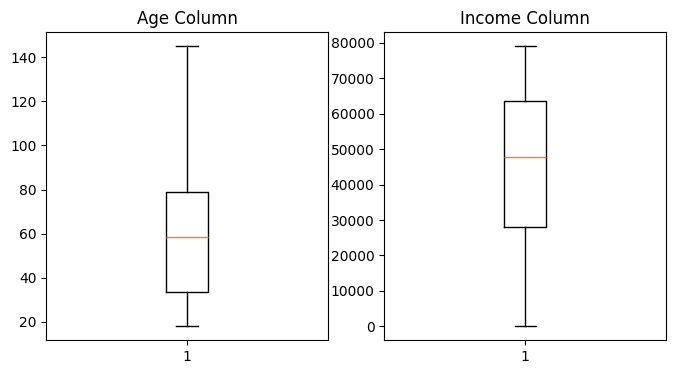

In [8]:
df = pd.read_csv("data/sample_data_with_outliers.csv")

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].boxplot(df['Age'])
axs[0].set_title('Age Column')

axs[1].boxplot(df['Income'])
axs[1].set_title('Income Column')
plt.show()

Doesn't really look like there are any outliers, right?  Guess again!  Let's try some histograms.

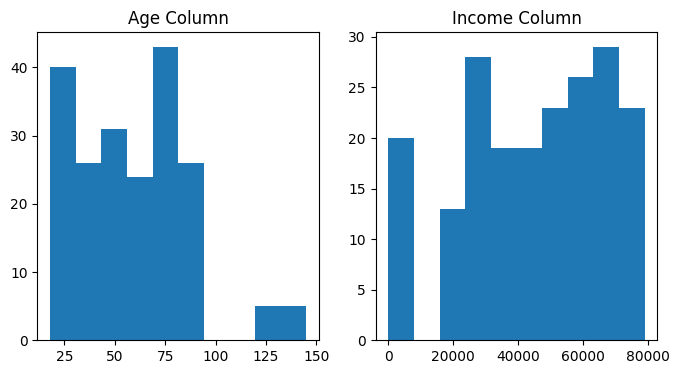

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].hist(df['Age'])
axs[0].set_title('Age Column')

axs[1].hist(df['Income'])
axs[1].set_title('Income Column')
plt.show()

That's weird.  Let's look more closely...

In [11]:
df[df["Income"]<20000]

,Age,Income,Purchase
48,89,5,0
49,76,97,0
59,79,98,0
62,70,33,1
67,127,70,0
73,126,33,0
77,122,84,0
86,52,54,1
108,120,20,0
122,128,46,0


That doesn't seem right!  Let's look at the age column.

In [13]:
df[df["Age"]>100]

,Age,Income,Purchase
67,127,70,0
73,126,33,0
77,122,84,0
108,120,20,0
122,128,46,0
139,139,28,0
150,138,68,0
157,145,16,0
161,138,26,1
193,139,31,0


Seems wrong too.  Ok, so, let's clean up.

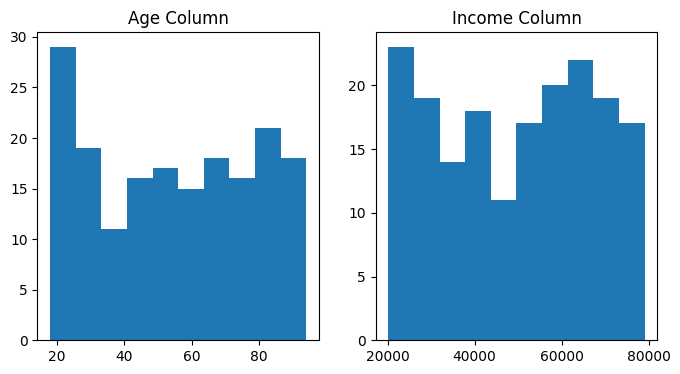

In [15]:
df_cleaned = df[(df.Age <120)&(df.Income > 100)]
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].hist(df_cleaned['Age'])
axs[0].set_title('Age Column')

axs[1].hist(df_cleaned['Income'])
axs[1].set_title('Income Column')
plt.show()

Much better!  Looking at the box plots again...

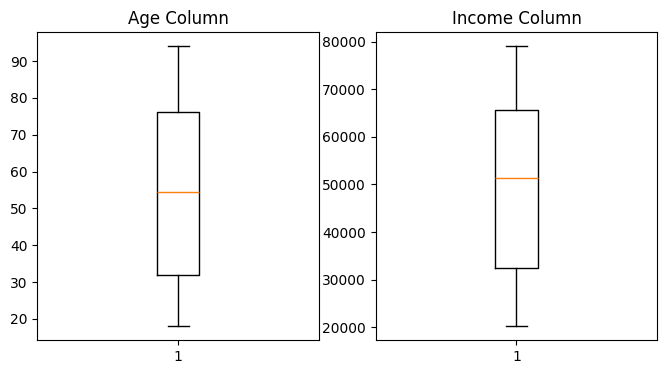

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
axs[0].boxplot(df_cleaned['Age'])
axs[0].set_title('Age Column')

axs[1].boxplot(df_cleaned['Income'])
axs[1].set_title('Income Column')
plt.show()